# Setting 

## libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

## load datasets 

In [2]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')
census_df = pd.read_csv('dataset/census_starter.csv')

In [3]:
def null_cols(df) : 
    missing_cols = [col for col in df.columns if df[col].isnull().any()]
    print(f'# of missing cols : {len(missing_cols)} and missing cols are {missing_cols}')

In [4]:
null_cols(train_df)
null_cols(test_df)

# of missing cols : 0 and missing cols are []
# of missing cols : 0 and missing cols are []


# EDA

## year/month

In [5]:
train_df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [6]:
# train : 2019/08 ~ 2022/10
train_df['first_day_of_month'].unique()

array(['2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
       '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
       '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
       '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
       '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
       '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
       '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
       '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
       '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
       '2022-08-01', '2022-09-01', '2022-10-01'], dtype=object)

In [7]:
# test : 2022/11 ~ 2023/06
test_df['first_day_of_month'].unique()

array(['2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
       '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01'],
      dtype=object)

In [8]:
for dt in [train_df, test_df] : 
    dt['year'] = dt['first_day_of_month'].str.split('-', expand = True).iloc[:, 0]
    dt['month'] = dt['first_day_of_month'].str.split('-', expand = True).iloc[:, 1]
    dt['year/month'] = dt['year'] + dt['month']
    dt['year'] = dt['year'].astype('int')
    dt['month'] = dt['month'].astype('int')
train_df.describe()

,cfips,microbusiness_density,active,year,month
count,122265.000000,122265.000000,1.222650e+05,122265.000000,122265.000000
mean,30376.037640,3.817671,6.442858e+03,2020.692308,6.692308
std,15143.508721,4.991087,3.304001e+04,0.991089,3.390452
min,1001.000000,0.000000,0.000000e+00,2019.000000,1.000000
25%,18177.000000,1.639344,1.450000e+02,2020.000000,4.000000
50%,29173.000000,2.586543,4.880000e+02,2021.000000,7.000000
75%,45077.000000,4.519231,2.124000e+03,2022.000000,10.000000
max,56045.000000,284.340030,1.167744e+06,2022.000000,12.000000


In [9]:
train_df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,year/month
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019,8,201908
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019,9,201909
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,2019,10,201910
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,2019,11,201911
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,2019,12,201912


In [10]:
train_df.groupby('year').mean()

,cfips,microbusiness_density,active,month
year,,,,
2019,30376.03764,3.732905,6274.823604,10.0
2020,30376.03764,3.722057,6350.289500,6.5
2021,30376.03764,3.841160,6408.619511,6.5
2022,30376.03764,3.946603,6679.044434,5.5


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
 7   year                   122265 non-null  int32  
 8   month                  122265 non-null  int32  
 9   year/month             122265 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(5)
memory usage: 8.4+ MB


In [12]:
train_df.groupby('year').mean()

,cfips,microbusiness_density,active,month
year,,,,
2019,30376.03764,3.732905,6274.823604,10.0
2020,30376.03764,3.722057,6350.289500,6.5
2021,30376.03764,3.841160,6408.619511,6.5
2022,30376.03764,3.946603,6679.044434,5.5


**연도별/월별 microbusiness density & active**
- `microbusiness_density` 
    - Microbusinesses per 100 people over the age of 18 in the given county. This is the target variable. The population figures used to calculate the density are on a two-year lag due to the pace of update provided by the U.S. Census Bureau, which provides the underlying population data annually. 2021 density figures are calculated using 2019 population figures, etc.

- `active` 
    - The raw count of microbusinesses in the county. **Not provided for the test set.**

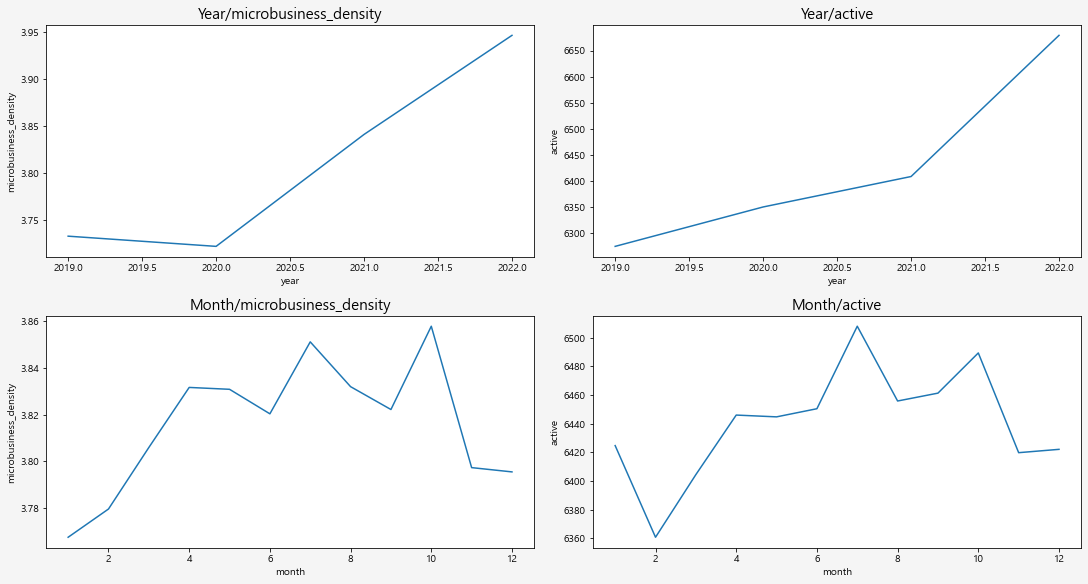

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(15,8), 
                       facecolor='whitesmoke', constrained_layout=True)
# 연도별 
sns.lineplot(data = train_df.groupby('year').mean(), 
             x = 'year', y = 'microbusiness_density', ax = ax[0, 0])
ax[0, 0].set_title('Year/microbusiness_density', fontsize = 15)
sns.lineplot(data = train_df.groupby('year').mean(), 
             x = 'year', y = 'active', ax = ax[0, 1])
ax[0, 1].set_title('Year/active', fontsize = 15)
# 월별
sns.lineplot(data = train_df.groupby('month').mean(), 
             x = 'month', y = 'microbusiness_density', ax = ax[1, 0])
ax[1, 0].set_title('Month/microbusiness_density', fontsize = 15)
sns.lineplot(data = train_df.groupby('month').mean(), 
             x = 'month', y = 'active', ax = ax[1, 1])
ax[1, 1].set_title('Month/active', fontsize = 15)

plt.show()

**microbusiness_density의 추이**

In [14]:
train_df

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,year/month
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019,8,201908
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019,9,201909
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,2019,10,201910
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,2019,11,201911
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,2019,12,201912
...,...,...,...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101,2022,6,202206
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101,2022,7,202207
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100,2022,8,202208
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100,2022,9,202209


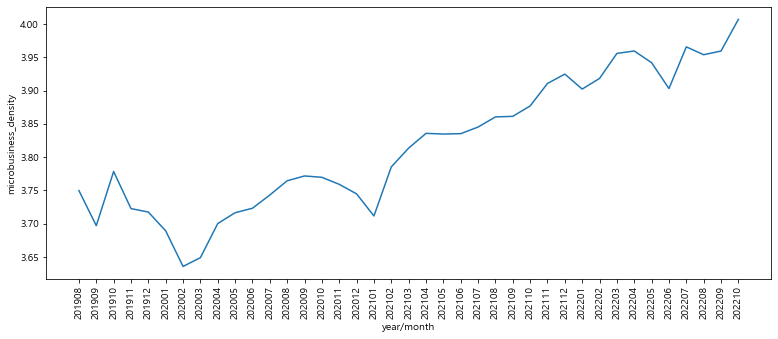

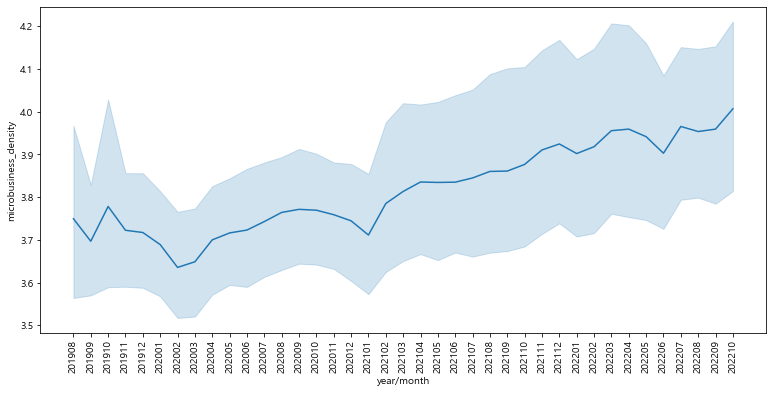

In [15]:
plt.figure(figsize = (13, 5))
sns.lineplot(data=train_df.groupby('year/month').mean(),
            x = 'year/month', y = 'microbusiness_density')
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize = (13, 6)) 
sns.lineplot(x = 'year/month', y = 'microbusiness_density', data = train_df)
plt.xticks(rotation = 90)
plt.show()

microbusiness_density는 2020년 일부 감소하는 구간이 존재하지만 전체적으로 증가하는 추세임을 알 수 있음 

전체 데이터를 보면 전반적으로 증가하는 추세임을 알 수 있음 

## state

In [16]:
train_df

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,year/month
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019,8,201908
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019,9,201909
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,2019,10,201910
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,2019,11,201911
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,2019,12,201912
...,...,...,...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101,2022,6,202206
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101,2022,7,202207
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100,2022,8,202208
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100,2022,9,202209


In [17]:
each_state=train_df.groupby(['state']).describe()['microbusiness_density'].sort_values('std')
each_state

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
District of Columbia,39.0,13.508989,0.294487,12.787801,13.269190,13.551914,13.697423,14.005946
Rhode Island,195.0,6.985363,1.207692,4.969075,6.032383,7.264053,8.120277,8.660382
West Virginia,2145.0,1.855457,1.241438,0.360211,0.878539,1.453722,2.542662,7.043378
Arkansas,2925.0,1.998925,1.497099,0.247328,0.974982,1.531890,2.445632,16.291933
Kansas,4095.0,2.463091,1.532490,0.562430,1.576070,2.148502,2.800141,14.035515
Mississippi,3198.0,1.696296,1.539697,0.000000,0.863192,1.305429,1.952426,14.852497
Alabama,2613.0,2.223274,1.584220,0.438305,1.202177,1.639288,2.709124,8.573463
Kentucky,4680.0,2.077160,1.731339,0.224027,0.953756,1.593625,2.662017,14.448168
Ohio,3432.0,3.034945,1.765796,0.637639,1.686132,2.482716,3.726996,9.845983


In [18]:
sort_std = each_state.index
sort_std

Index(['District of Columbia', 'Rhode Island', 'West Virginia', 'Arkansas',
       'Kansas', 'Mississippi', 'Alabama', 'Kentucky', 'Ohio', 'Louisiana',
       'North Dakota', 'Missouri', 'Minnesota', 'Maine', 'Wisconsin',
       'New Hampshire', 'Pennsylvania', 'Indiana', 'Nebraska', 'Michigan',
       'New Mexico', 'South Carolina', 'New Jersey', 'Oklahoma', 'Texas',
       'Montana', 'Washington', 'Hawaii', 'Arizona', 'Georgia', 'Connecticut',
       'Alaska', 'Illinois', 'North Carolina', 'Tennessee', 'Virginia', 'Iowa',
       'Massachusetts', 'New York', 'Vermont', 'California', 'Maryland',
       'Florida', 'Utah', 'Oregon', 'Idaho', 'South Dakota', 'Colorado',
       'Delaware', 'Wyoming', 'Nevada'],
      dtype='object', name='state')

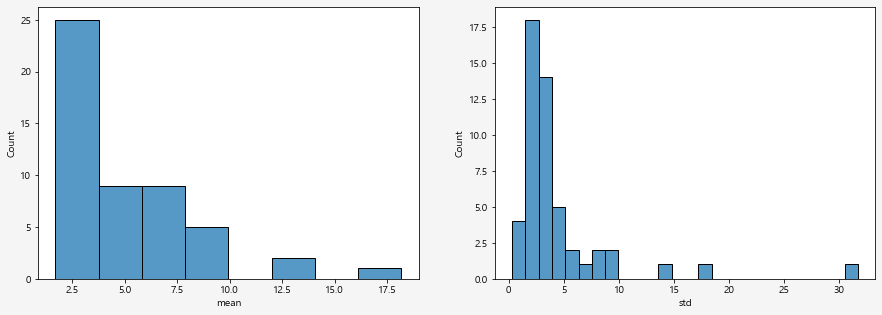

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5), facecolor = 'whitesmoke')
sns.histplot(x = 'mean', data = each_state, ax = ax[0])
sns.histplot(x = 'std', data = each_state, ax = ax[1])
plt.show()

In [20]:
# 평균이 높은 주는 어디인가? 
each_state[each_state['mean'] > 15]

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Delaware,117.0,18.184607,14.402883,4.995701,6.256529,14.675447,22.800505,59.590317


In [21]:
train_df[train_df['state'] == 'Delaware']['county'].nunique()

3

In [22]:
states = train_df.groupby('state')['county'].nunique().sort_values(ascending = False).index
for s in states : 
    ncounty = train_df[train_df['state'] == s]['county'].nunique()
    print(f'# of counties of {s} : {ncounty}')

# of counties of Texas : 254
# of counties of Georgia : 159
# of counties of Virginia : 130
# of counties of Kentucky : 120
# of counties of Missouri : 115
# of counties of Kansas : 105
# of counties of Illinois : 102
# of counties of North Carolina : 100
# of counties of Iowa : 99
# of counties of Tennessee : 95
# of counties of Nebraska : 92
# of counties of Indiana : 92
# of counties of Ohio : 88
# of counties of Minnesota : 87
# of counties of Michigan : 83
# of counties of Mississippi : 82
# of counties of Oklahoma : 77
# of counties of Arkansas : 75
# of counties of Wisconsin : 72
# of counties of Pennsylvania : 67
# of counties of Alabama : 67
# of counties of Florida : 67
# of counties of South Dakota : 65
# of counties of Colorado : 64
# of counties of Louisiana : 64
# of counties of New York : 62
# of counties of California : 58
# of counties of Montana : 56
# of counties of West Virginia : 55
# of counties of North Dakota : 53
# of counties of South Carolina : 46
# of counti

### 분산이 낮은 state의 추이

In [23]:
train_df[train_df['state'].isin(sort_std[:5])]

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,year/month
4251,5001_2019-08-01,5001,Arkansas County,Arkansas,2019-08-01,1.552795,220,2019,8,201908
4252,5001_2019-09-01,5001,Arkansas County,Arkansas,2019-09-01,1.552795,220,2019,9,201909
4253,5001_2019-10-01,5001,Arkansas County,Arkansas,2019-10-01,1.496330,212,2019,10,201910
4254,5001_2019-11-01,5001,Arkansas County,Arkansas,2019-11-01,1.461039,207,2019,11,201911
4255,5001_2019-12-01,5001,Arkansas County,Arkansas,2019-12-01,1.418690,201,2019,12,201912
...,...,...,...,...,...,...,...,...,...,...
118555,54109_2022-06-01,54109,Wyoming County,West Virginia,2022-06-01,0.434258,72,2022,6,202206
118556,54109_2022-07-01,54109,Wyoming County,West Virginia,2022-07-01,0.440290,73,2022,7,202207
118557,54109_2022-08-01,54109,Wyoming County,West Virginia,2022-08-01,0.434258,72,2022,8,202208
118558,54109_2022-09-01,54109,Wyoming County,West Virginia,2022-09-01,0.434258,72,2022,9,202209


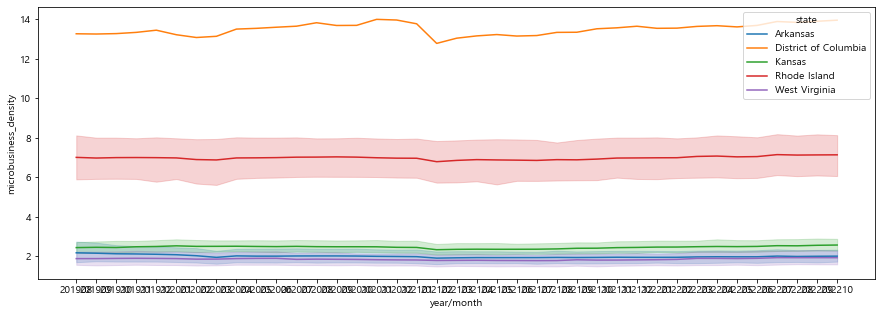

In [24]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = 'year/month', y = 'microbusiness_density', 
             data = train_df[train_df['state'].isin(sort_std[:5])],
             hue = 'state')
plt.show()


District of Columbia는 county가 1개이며, 값이 크기 때문에 제외하고 plot 출력

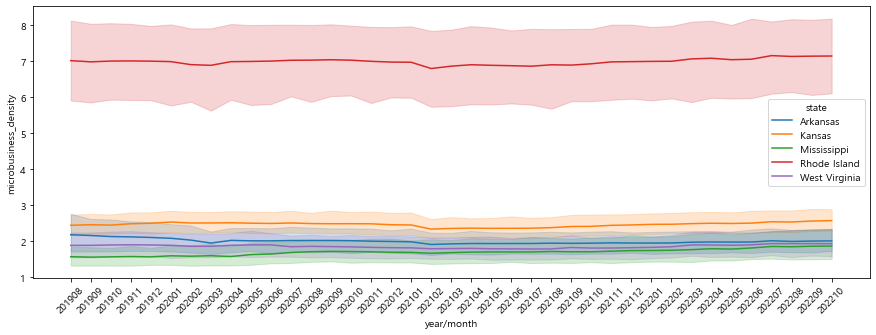

In [25]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = 'year/month', y = 'microbusiness_density', 
             data = train_df[train_df['state'].isin(sort_std[1:6])],
             hue = 'state')
locs, labels = plt.xticks()
plt.setp(labels, rotation = 45)
plt.show()


해당 지역들은 microbusiness density가 일정한 것을 알 수 있음 

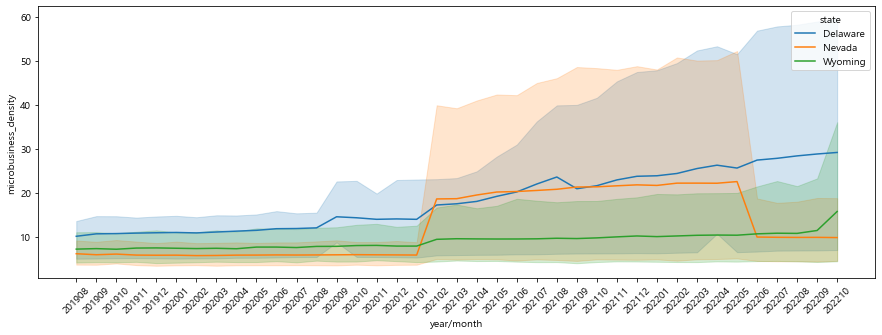

In [26]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = 'year/month', y = 'microbusiness_density', 
             data = train_df[train_df['state'].isin(['Wyoming', 'Nevada', 'Delaware'])],
             hue = 'state')
# plt.xticks([], [])
# plt.yticks([], [])
locs, labels = plt.xticks()
plt.setp(labels, rotation = 45)
plt.show()


분산이 큰 지역은 시간에 따라 상대적으로 변화가 큰 것을 알 수 있음 

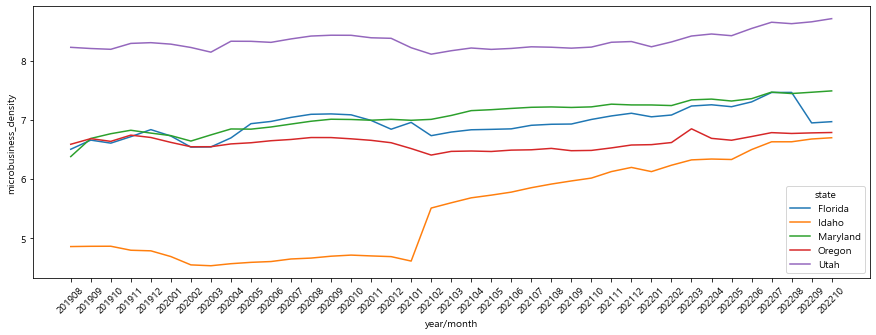

In [27]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = 'year/month', y = 'microbusiness_density', 
             data = train_df[train_df['state'].isin(sort_std[-10:-5])],
             hue = 'state', ci = None)
locs, labels = plt.xticks()
plt.setp(labels, rotation = 45)

plt.show()


### 같은 주 안의 county끼리는 비슷한 특징을 가지는가?

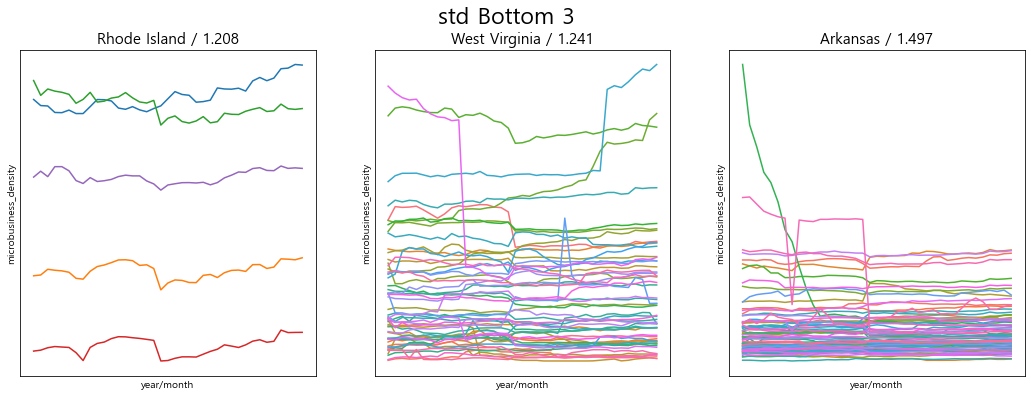

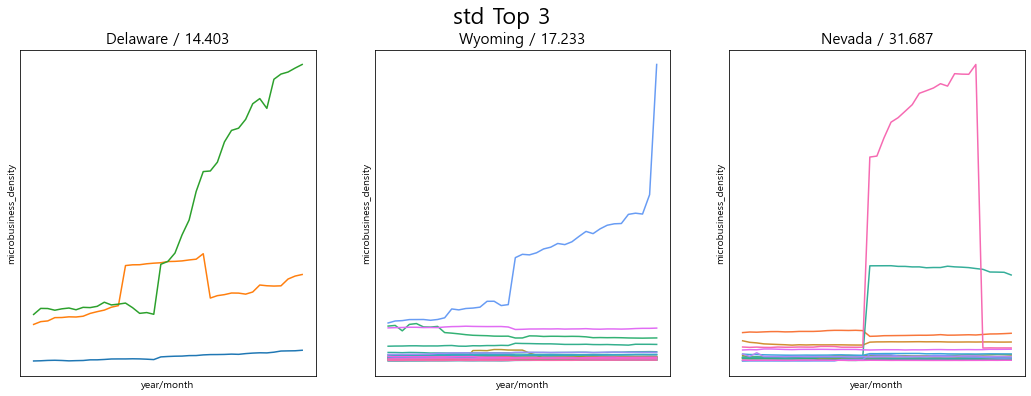

In [28]:
def county_in_the_same_state(state, legend = False) :
    sns.lineplot(data = train_df[train_df['state'] == state],
                 x = 'year/month', y = 'microbusiness_density',
                 hue = 'county', legend = legend)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    plt.title(f"{state} / {np.round(each_state['std'][state], 3)}", fontsize = 15)
    plt.xticks([], [])
    plt.yticks([], [])


plt.figure(figsize = (18, 6))
plt.suptitle('std Bottom 3', fontsize = 23, va = 'top')
fig.tight_layout()
for i in range(3) : 
    plt.subplot(1, 3, i+1)
    county_in_the_same_state(sort_std[[1,2,3][i]], False)
    
plt.figure(figsize = (18, 6))
plt.suptitle('std Top 3 \n', fontsize = 23, va = 'top')
fig.tight_layout()
for i in range(3) : 
    plt.subplot(1, 3, i+1)
    county_in_the_same_state(sort_std[[-3, -2, -1][i]], False)

분산이 작은 경우는 state 내의 county들도 일정한 패턴을 보이거나, 변동이 생겨도 대부분의 county들이 같은 패턴을 보이는 것을 알 수 있음 

그리고, 분산이 큰 경우에도 모든 county가 변동이 심한 것이 아니라, 특정 몇 개의 county에서 변동이 크게 나타나는 것을 알 수 있음 

**Nevada에서 변동이 가장 큰 2개의 county를 제거하면?**

In [29]:
train_df[train_df['state'] == 'Nevada'].groupby('cfips').std().sort_values('microbusiness_density')['microbusiness_density']

cfips
32033     0.062523
32015     0.114523
32007     0.133275
32021     0.141500
32019     0.159589
32001     0.186078
32031     0.193533
32009     0.445036
32013     0.456415
32023     0.493892
32029     0.552832
32011     1.050216
32005     1.081547
32003     1.504518
32027     1.738453
32017    33.919938
32510    93.048603
Name: microbusiness_density, dtype: float64

In [30]:
large_std_list = train_df[train_df['state'] == 'Nevada'].groupby('cfips').std().sort_values('microbusiness_density')['microbusiness_density'].tail(2).index.to_list()
print(large_std_list)

print('std is : ',train_df[(train_df['state'] == 'Nevada') & (~train_df['cfips'].isin(large_std_list))]['microbusiness_density'].std())


[32017, 32510]
std is :  5.5332509584395355


In [32]:
print('original std is : ',train_df[(train_df['state'] == 'Nevada') ]['microbusiness_density'].std())
print('top2 removed std is : ',train_df[(train_df['state'] == 'Nevada') & (~train_df['cfips'].isin(large_std_list))]['microbusiness_density'].std())

original std is :  31.687018255741442
top2 removed std is :  5.5332509584395355


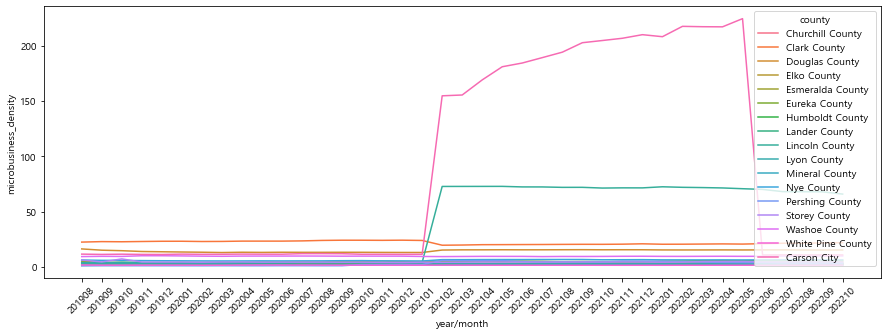

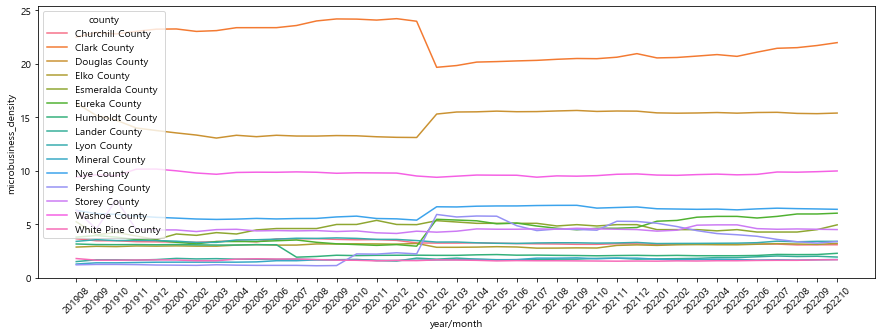

In [33]:
plt.figure(figsize=(15, 5))
sns.lineplot(data = train_df[(train_df['state']=='Nevada')],
             x = 'year/month', y = 'microbusiness_density', hue = 'county')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

plt.figure(figsize=(15, 5))
sns.lineplot(data = train_df[(train_df['state']=='Nevada')&(~train_df['cfips'].isin(large_std_list))],
             x = 'year/month', y = 'microbusiness_density', hue = 'county')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

분산이 큰 2개의 county를 제외하면 상대적으로 일정한 것을 알 수 있음
- 그리고 2021년 1월에서 2021년 2월로 넘어가는 시기에 많은 county에서 큰 변화가 생겼음


In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(data = train_df.groupby('cfips').std(),
             x = 'microbusiness_density', bins = 100)
plt.show()

In [ ]:
train_df.groupby('cfips').std()['microbusiness_density'].quantile(0.99)

In [ ]:
train_df.groupby('cfips').std()['microbusiness_density'].describe()

cfips별 microbusiness density의 상위 1%가 3.58인데 반해 max는 93.05임을 알 수 있다. 

이상치로 판단되지만 한 번 살펴볼 필요가 있다. 

In [ ]:
cfips_std = train_df.groupby('cfips')['microbusiness_density'].std()
large_std_cfips = cfips_std[cfips_std>20].index

In [ ]:
large_std_cfips

In [ ]:
train_df[train_df['cfips'].isin(large_std_cfips)]

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = 'year/month', y = 'microbusiness_density', 
             data = train_df[train_df['cfips'].isin(large_std_cfips)], 
             hue = 'county')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
train_df[(train_df['county'] == 'Union County') & (train_df['year/month'] == '201908')]['microbusiness_density'].mean()

In [ ]:
train_df[(train_df['county'] == 'Union County') & (train_df['year/month'] == '201909')]['microbusiness_density'].mean()

In [ ]:
train_df[train_df['cfips'].isin(large_std_cfips)]

In [ ]:
train_df[train_df['county'] == 'Union County']['cfips'].unique()

In [ ]:
train_df.groupby('county')['cfips'].nunique().sort_values(ascending = False)

In [ ]:
train_df[train_df['county'] == 'Washington County'][['county', 'cfips']].drop_duplicates()